# 1. Overview the Data

Import pandas and sqlite3.

In [2]:
import pandas as pd
import sqlite3

Connect to factbook.db and use pandas.read_sql_query() to return information on the tables in the database.

In [3]:
conn = sqlite3.connect("factbook.db")
q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [6]:
q2 = "select * from facts limit 5"
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


# 2. Summary Statistics

Write a single query that returns the Minimum population

In [14]:
q3 = "select min(population) from facts"
pd.read_sql_query(q3, conn)

,cast(min(population) as float)
0,0.0


Maximum population

In [15]:
q4 = "select max(population) from facts"
pd.read_sql_query(q4, conn)

,max(population)
0,7256490011


Minimum population growth

In [16]:
q5 = "select min(population_growth) from facts"
pd.read_sql_query(q5, conn)

,min(population_growth)
0,0.0


Maximum population growth

In [17]:
q6 = "select max(population_growth) from facts"
pd.read_sql_query(q6, conn)

,max(population_growth)
0,4.02


# 3. Exploring outliers

Write a query that returns the countrie(s) with a population of 0.

In [19]:
q7 = "select * from facts where population = 0"
pd.read_sql_query(q7, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


Write a query that returns the countrie(s) with a population of 7256490011.

In [20]:
q8 = "select * from facts where population = 7256490011"
pd.read_sql_query(q8, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


<b> In a markdown cell, type up your observations on these rows.</b>

Antártida tiene una población de 0 habitantes. El mundo está incluido como uno de los países.

# 4. Histograms

In [52]:
q9 = "select population, population_growth, birth_rate, death_rate from facts where population NOT LIKE 0 OR 7256490011"
non_outlier = pd.read_sql_query(q9, conn)
non_outlier.head()

,population,population_growth,birth_rate,death_rate
0,32564342.0,2.32,38.57,13.89
1,3029278.0,0.30,12.92,6.58
2,39542166.0,1.84,23.67,4.31
3,85580.0,0.12,8.13,6.96
4,19625353.0,2.78,38.78,11.49


Using just the non-outlier rows, generate a 2 by 2 grid of histograms for the following columns:

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

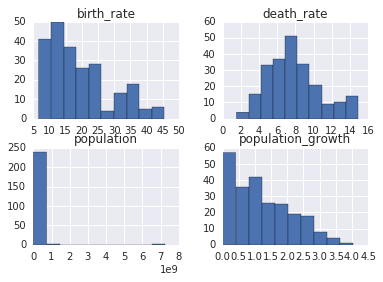

In [53]:
hist = non_outlier.hist(bins=10)

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec16139748>,
      dtype=object)

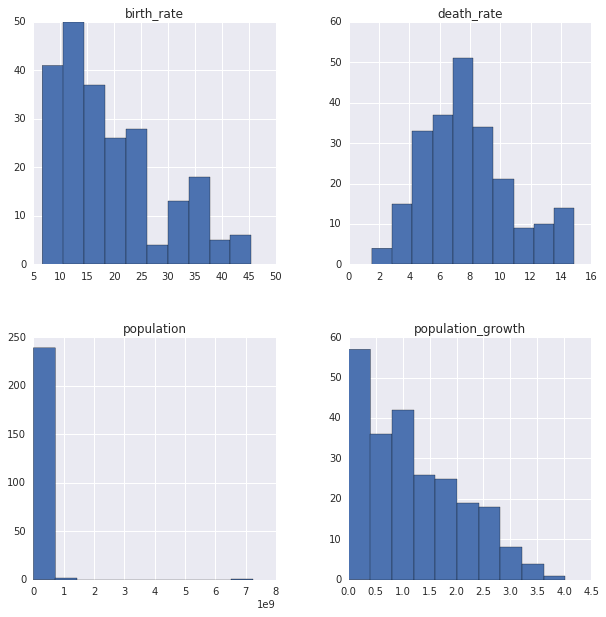

In [50]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
non_outlier.hist(ax=ax)

# Which countries have the highest population density?

Population density is the ratio of population to land area. Compare your results with those from Wikipedia.

In [63]:
q10 = "select name, cast(population as float)/cast(area_land as float) density from facts order by density DESC"
density = pd.read_sql_query(q10, conn)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec0c2b04e0>]],
      dtype=object)

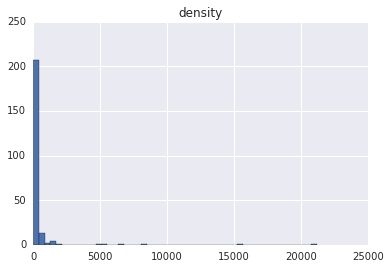

In [66]:
density.hist(bins=50)

Which countries have the highest ratios of water to land? Which countries have more water than land?

In [70]:
q11 = "select name, cast(area_water as float) / cast(area_land as float) ratio_water from facts order by ratio_water DESC"
pd.read_sql_query(q11, conn)

,name,ratio_water
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
2,Puerto Rico,0.554791
3,"Bahamas, The",0.386613
4,Guinea-Bissau,0.284673
5,Malawi,0.259396
6,Netherlands,0.225710
7,Uganda,0.222922
8,Eritrea,0.164356
9,Liberia,0.156240


In [71]:
q12 = "select name, area_land, area_water from facts where cast(area_water as float) > cast(area_land as float)"
pd.read_sql_query(q12, conn)

,name,area_land,area_water
0,British Indian Ocean Territory,60,54340
1,Virgin Islands,346,1564
